<a href="https://colab.research.google.com/github/rud-3003/ML/blob/main/7Image_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

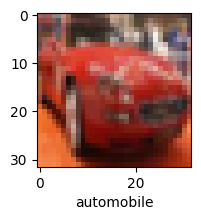

In [10]:
plot_sample(X_train, y_train, 5)

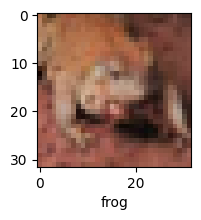

In [11]:
plot_sample(X_test, y_test, 5)

In [12]:
X_train = X_train / 255.0
X_test = X_test /255.0

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation= "softmax")
    ])

ann.compile(optimizer = "SGD",
            loss= "sparse_categorical_crossentropy",
            metrics= ["accuracy"])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 132s 84ms/step - accuracy: 0.3099 - loss: 1.9212
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 84ms/step - accuracy: 0.4209 - loss: 1.6441
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.4585 - loss: 1.5409
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 133s 85ms/step - accuracy: 0.4771 - loss: 1.4837
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 86ms/step - accuracy: 0.4958 - loss: 1.4379


In [14]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step
Classification report: 
               precision    recall  f1-score   support

           0       0.65      0.40      0.50      1000
           1       0.32      0.89      0.47      1000
           2       0.43      0.26      0.32      1000
           3       0.35      0.36      0.35      1000
           4       0.51      0.30      0.38      1000
           5       0.49      0.25      0.33      1000
           6       0.45      0.66      0.53      1000
           7       0.53      0.57      0.55      1000
           8       0.64      0.51      0.56      1000
           9       0.59      0.32      0.41      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [17]:
import seaborn as sns
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel("Truth")
plt.xlabel("Prediction")
plt.title("Confusion Matrix")
plt.show()

KeyboardInterrupt: 

In [16]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [19]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.3925 - loss: 1.6602
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6101 - loss: 1.1143
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6660 - loss: 0.9585
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.7024 - loss: 0.8588
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.7303 - loss: 0.7713
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7524 - loss: 0.7104
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7761 - loss: 0.6429
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7890 - loss: 0.6066
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8020 - loss: 0.5576
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.8196 - loss: 0.5134


In [20]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.7033 - loss: 0.9318


[0.9435698986053467, 0.7037000060081482]

In [21]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [22]:
y_pred[:5]

array([[6.77300384e-04, 1.14361937e-04, 1.07239485e-02, 6.85049355e-01,
        1.47997882e-04, 2.82346904e-01, 9.82343126e-03, 3.39935767e-04,
        9.40455962e-03, 1.37212535e-03],
       [4.54486208e-03, 2.16018911e-02, 5.90464253e-07, 2.50628489e-07,
        1.21098674e-06, 7.72224155e-07, 1.32378464e-09, 1.52427810e-06,
        9.72229838e-01, 1.61898346e-03],
       [3.91101509e-01, 2.81794425e-02, 1.26083614e-03, 1.83377101e-03,
        1.14392454e-03, 7.87913974e-04, 6.32068695e-05, 1.57393031e-02,
        5.07186949e-01, 5.27030453e-02],
       [9.82721031e-01, 1.88179532e-04, 1.40348828e-04, 4.64373852e-06,
        2.58495384e-05, 3.25296838e-07, 2.71160316e-09, 4.39579844e-06,
        1.69125274e-02, 2.73259843e-06],
       [1.59412014e-06, 4.47613820e-05, 4.11647677e-01, 8.75389725e-02,
        3.45154375e-01, 5.12920460e-03, 1.50348246e-01, 1.06580937e-05,
        1.15058581e-04, 9.37623372e-06]], dtype=float32)

In [23]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 2]

In [24]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

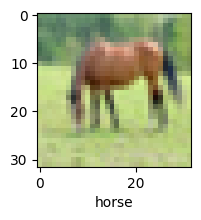

In [25]:
plot_sample(X_test, y_test, 60)

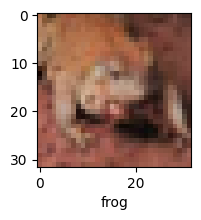

In [27]:
plot_sample(X_test, y_test, 5)

In [29]:
classes[y_classes[60]]

'horse'